<a href="https://colab.research.google.com/github/fabiomiguell/AtividadesMackenzie/blob/main/PL_Atividade1_Fabio_Miguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




# **Nome**: Fabio de Oliveira Miguel
# **Matrícula**: 92274714
---




# **Atividade** 
---

Implemente um programa em Python (Python notebook) que constrói um dicionário de termos de um documento (mínimo 1000 palavras) com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.  

Comente ao final os resultados **obtidos**

# **Introdução** 

No mês em que comemoramos o Bicentenário da  Independência do Brasil, muitos brasileiros não conhecem em detalhes a sua própria história. Escolhi o texto publicado no site Brasil Escola do Uol, que mostra os detalhes de como ocorreu a revolução de 1822 para a separação de Portugal.

## Aquisição dos Dados

In [ ]:
import urllib.request  

texto = []

for line in urllib.request.urlopen ('https://brasilescola.uol.com.br/historiab/independencia-brasil.htm'): 
    texto.append(line.decode('utf-8'))

#exclusão de caracteres especiais
for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace('"','')# elimina ' e "
    


# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)

{'<doctype': 1, 'html>': 1, '<html': 1, 'xml:lang=pt-br': 1, 'lang=pt-br': 1, 'xmlns:fb=http://ogpme/ns/fb#>': 1, '<head>': 1, '<link': 32, 'rel=dns-prefetch': 25, 'href=//ogpme>': 1, 'href=//brasilescolauolcombr>': 1, 'href=//s5staticbrasilescolauolcombr>': 1, 'href=//mbrasilescolauolcombr>': 1, 'href=//authbrasilescolauolcombr>': 1, 'href=//appbrasilescolauolcombr>': 1, 'href=//wwwgoogletagmanagercom>': 1, 'href=//wwwfacebookcom>': 1, 'href=//wwww3org>': 1, 'href=//twittercom>': 1, 'href=//wwwinstagramcom>': 1, 'href=//vestibularbrasilescolauolcombr>': 1, 'href=//monografiasbrasilescolauolcombr>': 1, 'href=//educadorbrasilescolauolcombr>': 1, 'href=//exerciciosbrasilescolauolcombr>': 1, 'href=//escolakidsuolcombr>': 1, 'href=//meuartigobrasilescolauolcombr>': 1, 'href=//brasilescola>': 1, 'href=//schemaorg>': 1, 'href=//s2staticbrasilescolauolcombr>': 1, 'href=//wwwshutterstockcom>': 1, 'href=//s1staticbrasilescolauolcombr>': 1, 'href=//s4staticbrasilescolauolcombr>': 1, 'href=//wwwy

# Exibição dos Resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


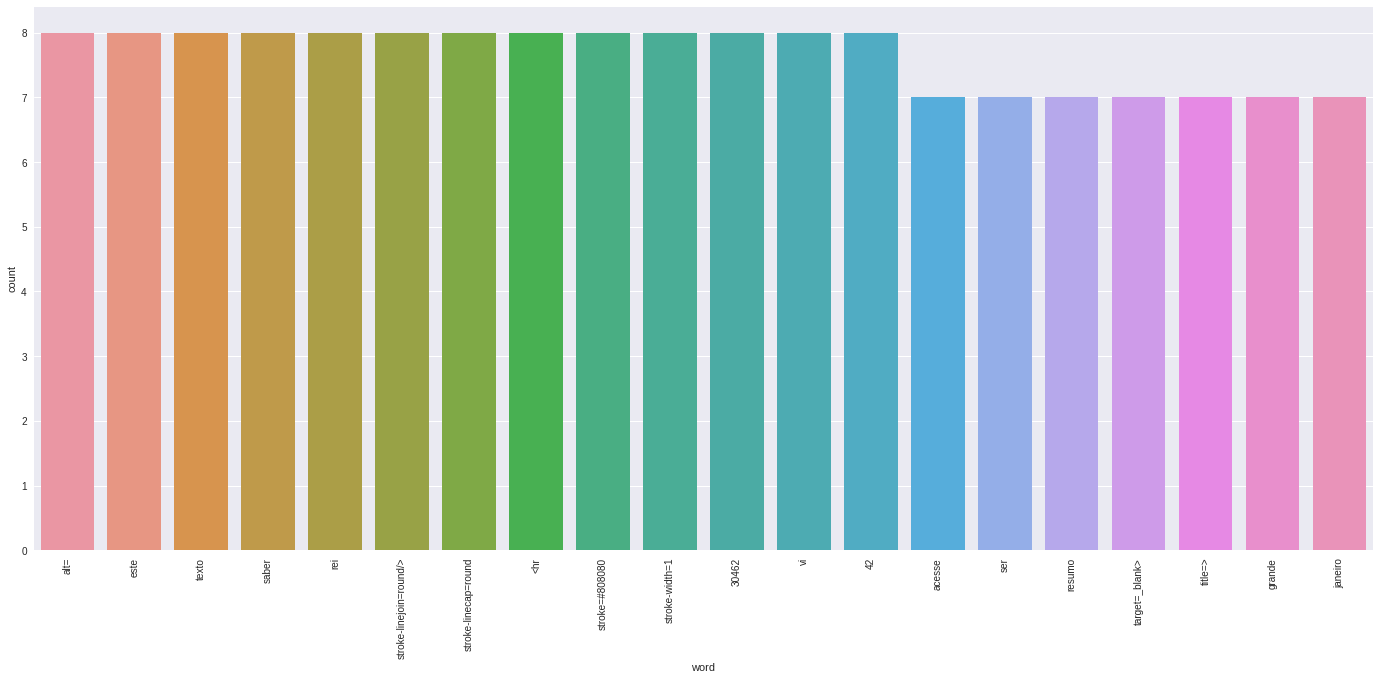

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  
                  columns=['word', 'count']).sort_values('count',ascending=False).reset_index()
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()